In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

In [2]:
##Reading the dataset
df = pd.read_csv('sentiment.tsv',sep = '\t')
df.columns = ['label', 'body_txt']
df.head()

,label,body_txt
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,neg,Had a dream about a walk in fast food resturau...
2,neg,hates @internet @explrer (angry)(angry) **but ...
3,neg,@federalcase I said I go out for eat 5:negneg...
4,neg,@babykates7 yeah they won't do the surgery til...


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.label = le.fit_transform(df.label)
df.head()

,label,body_txt
0,0,"@jamielewislewis i cant believe it, it really ..."
1,0,Had a dream about a walk in fast food resturau...
2,0,hates @internet @explrer (angry)(angry) **but ...
3,0,@federalcase I said I go out for eat 5:negneg...
4,0,@babykates7 yeah they won't do the surgery til...


In [4]:
##Data Cleaning 
def remove_pattern(input_text,pattern='@[\w]*'):
    r = re.findall(pattern,input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
    return input_text

In [5]:
df['cleaned_tweet'] = np.vectorize(remove_pattern)(df.body_txt,'@[\w]*')
df.head()

,label,body_txt,cleaned_tweet
0,0,"@jamielewislewis i cant believe it, it really ...","i cant believe it, it really doesnt belong th..."
1,0,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...
2,0,hates @internet @explrer (angry)(angry) **but ...,hates (angry)(angry) **but no choice** http...
3,0,@federalcase I said I go out for eat 5:negneg...,I said I go out for eat 5:negneg p.m. I dis...
4,0,@babykates7 yeah they won't do the surgery til...,yeah they won't do the surgery till the cold ...


In [6]:
#Remove Special Characters, numbers, punctuations
df.cleaned_tweet = df.cleaned_tweet.str.replace("[^a-zA-Z#]"," ")
df.head()

,label,body_txt,cleaned_tweet
0,0,"@jamielewislewis i cant believe it, it really ...",i cant believe it it really doesnt belong th...
1,0,Had a dream about a walk in fast food resturau...,Had a dream about a walk in fast food resturau...
2,0,hates @internet @explrer (angry)(angry) **but ...,hates angry angry but no choice http...
3,0,@federalcase I said I go out for eat 5:negneg...,I said I go out for eat negneg p m I dis...
4,0,@babykates7 yeah they won't do the surgery til...,yeah they won t do the surgery till the cold ...


In [7]:
#Tokenize the tweets
tokenized_tweet = df.cleaned_tweet.apply(lambda x:x.split())
tokenized_tweet

0       [i, cant, believe, it, it, really, doesnt, bel...
1       [Had, a, dream, about, a, walk, in, fast, food...
2       [hates, angry, angry, but, no, choice, http, p...
3       [I, said, I, go, out, for, eat, negneg, p, m, ...
4       [yeah, they, won, t, do, the, surgery, till, t...
                              ...                        
1996    [Just, smashed, this, Tommy, s, for, my, PM, b...
1997    [spent, yesterday, outside, myself, got, a, bi...
1998                    [I, take, pride, in, what, I, do]
1999                         [heading, to, work, on, the]
2000                                            [asi, es]
Name: cleaned_tweet, Length: 2001, dtype: object

In [8]:
#Everthing will be converted to lower case, normalsing words e.g. having -> have
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweet

0       [i, cant, believ, it, it, realli, doesnt, belo...
1       [had, a, dream, about, a, walk, in, fast, food...
2       [hate, angri, angri, but, no, choic, http, plu...
3       [i, said, i, go, out, for, eat, negneg, p, m, ...
4       [yeah, they, won, t, do, the, surgeri, till, t...
                              ...                        
1996    [just, smash, thi, tommi, s, for, my, pm, brea...
1997    [spent, yesterday, outsid, myself, got, a, bit...
1998                    [i, take, pride, in, what, i, do]
1999                            [head, to, work, on, the]
2000                                            [asi, es]
Name: cleaned_tweet, Length: 2001, dtype: object

In [9]:
#Joining back the tokenized tweet into a single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df.cleaned_tweet = tokenized_tweet
df.head()

,label,body_txt,cleaned_tweet
0,0,"@jamielewislewis i cant believe it, it really ...",i cant believ it it realli doesnt belong there...
1,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...
2,0,hates @internet @explrer (angry)(angry) **but ...,hate angri angri but no choic http plurk com p...
3,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i disappoin...
4,0,@babykates7 yeah they won't do the surgery til...,yeah they won t do the surgeri till the cold i...


In [10]:
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")), 3)*100

In [11]:
df['body_len'] = df.body_txt.apply(lambda x:len(x)-x.count(x))
df['punc_%'] = df.body_txt.apply(lambda x:count_punc(x))
df.head()

,label,body_txt,cleaned_tweet,body_len,punc_%
0,0,"@jamielewislewis i cant believe it, it really ...",i cant believ it it realli doesnt belong there...,137,4.4
1,0,Had a dream about a walk in fast food resturau...,had a dream about a walk in fast food resturau...,117,1.0
2,0,hates @internet @explrer (angry)(angry) **but ...,hate angri angri but no choic http plurk com p...,82,21.3
3,0,@federalcase I said I go out for eat 5:negneg...,i said i go out for eat negneg p m i disappoin...,71,8.6
4,0,@babykates7 yeah they won't do the surgery til...,yeah they won t do the surgeri till the cold i...,98,6.1


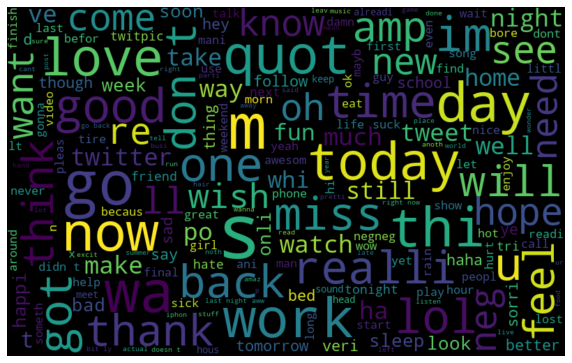

In [12]:
#Generting word Cloud for data
all_words = ' '.join([text for text in df.cleaned_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

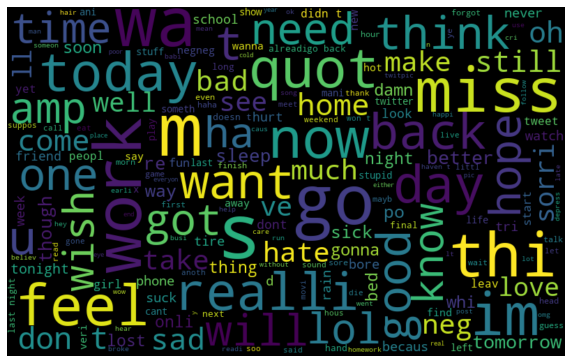

In [13]:
#Word Cloud for negative words
negative_words = ' '.join([text for text in df.cleaned_tweet[df.label==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(stop_words='english')
bow = bow_vectorizer.fit_transform(df.cleaned_tweet)
#x_count_feat = pd.concat([df.body_len,df['punc_%'],pd.DataFrame(bow.toarray())],axis=1)
x_count_feat = pd.DataFrame(bow.toarray())
x_count_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Testing Classification methods
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
model = []
model.append(('lr',LogisticRegression()))
model.append(('rfc',RandomForestClassifier()))
model.append(('gbc',GradientBoostingClassifier()))
model.append(('svc',SVC()))
model.append(('gnb',GaussianNB()))
model.append(('dtc',DecisionTreeClassifier()))
model.append(('knn',KNeighborsClassifier()))

In [33]:
#Performing 10-fold Cross Validation on all Models
for mod,clf in model:
    scores = cross_val_score(clf,x_count_feat,df['label'],scoring='accuracy',cv=10)
    print("%s Model has a score of %f"%(mod,scores.mean()))

lr Model has a score of 0.672659
rfc Model has a score of 0.671654
gbc Model has a score of 0.648662
svc Model has a score of 0.685149
gnb Model has a score of 0.583677
dtc Model has a score of 0.648669
knn Model has a score of 0.569689


In [34]:
params = {'C' : [0.001,0.1,1,10,100]}
gridsearch = GridSearchCV(LogisticRegression(),params,cv=10)
gridsearch.fit(x_count_feat,df['label'])

/home/haritha/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/haritha/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100]})

In [35]:
gridsearch.best_params_

{'C': 0.1}

In [36]:
best_lg = gridsearch.best_estimator_

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_count_feat,df['label'],test_size=0.33,random_state=42)

In [38]:
best_lg.fit(x_train,y_train)
y_pred = best_lg.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
confusion_matrix(y_test,y_pred)

array([[217, 108],
       [ 98, 238]])

In [41]:
accuracy_score(y_test,y_pred)

0.6883509833585476

In [47]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,